In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap
import seaborn as sns

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_all_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_all_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_all_mm_cl= df_combined_all_mm.drop(columns=['filename', 'label'])
df_combined_all_z_cl= df_combined_all_z.drop(columns=['filename', 'label'])

In [3]:
df_combined_all_z_cl

,eccentricity,extent,solidity,contrast,homogeneity,energy,mean_magnitude,std_magnitude,brightness,hue,saturation
0,1.258475,-0.843346,0.135962,-0.117970,0.573895,1.615441,-0.675069,-0.789859,-0.258016,0.173814,-0.908055
1,1.265948,-1.740919,-1.705151,-0.689035,1.111661,1.826963,-0.332674,0.421457,1.450514,3.173069,-2.630162
2,0.280864,1.120647,1.269197,0.723027,-0.528180,-0.424014,-0.726203,-1.157138,-0.160670,-0.718451,0.927561
3,0.602786,1.184475,0.913221,0.125226,-0.517080,-0.809188,-0.624806,-0.816866,0.338521,-0.373024,0.458052
4,-0.817832,1.002834,1.210664,1.304987,-1.718236,-0.716244,-1.317448,-1.644363,-0.045647,-0.064264,0.141367
...,...,...,...,...,...,...,...,...,...,...,...
532,-0.758095,-0.543333,-0.607485,-0.277401,0.875899,0.606081,0.749086,0.945783,0.602273,0.893369,-0.410392
533,-1.279988,0.358045,0.055104,0.083434,1.088512,-0.232107,0.989613,0.780056,-0.105928,0.014286,0.361934
534,0.155389,-0.292736,-0.289068,-0.097836,0.451454,-0.024781,0.873905,0.820400,0.114134,1.284708,-0.041958
535,-0.407132,-1.763399,-1.467330,-0.449770,1.655792,2.974858,0.896289,1.520130,1.430725,2.768508,-1.294443


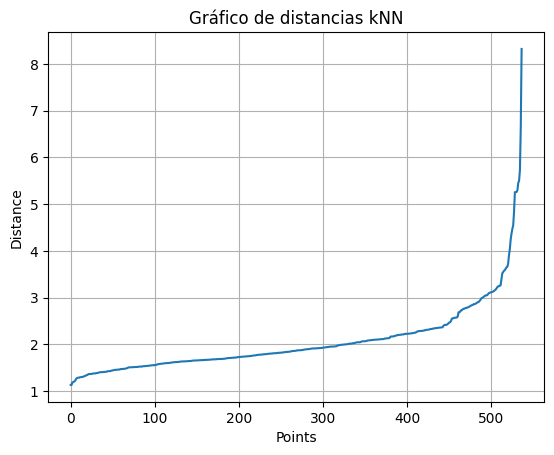

In [4]:
k = 11 #21
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined_all_z_cl)
distances, indices = neighbors_fit.kneighbors(df_combined_all_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [65]:
X_combined_all_z = np.array(df_combined_all_z_cl)

clustering = DBSCAN(eps=1.5, min_samples=10).fit(X_combined_all_z) 
clustering.labels_

array([-1, -1,  0,  0,  1, -1, -1, -1,  0,  1, -1, -1, -1,  0, -1, -1, -1,
       -1,  1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,  0,  0,
       -1,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  1, -1, -1, -1, -1,  0, -1,  0,
        0,  0, -1, -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1,  0

In [66]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 324


In [67]:
y_true = df_combined_all_z['label'] 
y_pred = clustering.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_z)

Cluster DBSCAN   -1    0   1
Etiqueta Real               
higher          134  134   0
smaller         190   70   9


In [68]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_combined_all_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.249


min-max

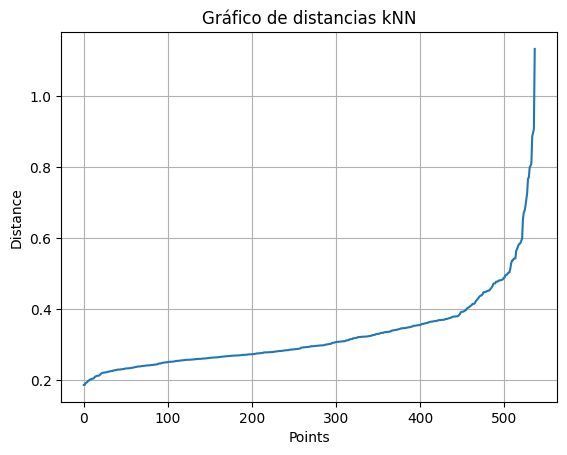

In [63]:
k = 11
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined_all_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_combined_all_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [102]:
X_combined_all_mm = np.array(df_combined_all_mm_cl)

clustering_mm = DBSCAN(eps=0.231, min_samples=10).fit(X_combined_all_mm) #1.2 #35 #
clustering_mm.labels_

array([-1, -1,  1,  0,  1, -1, -1, -1,  0,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  0, -1,  0,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1,  0, -1,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
        0, -1,  0,  0,  0, -1,  0, -1,  0,  1, -1, -1, -1, -1,  0, -1,  0,
       -1,  0, -1, -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1,  0

In [103]:
labels_mm = clustering_mm.labels_
n_clusters_mm = len(set(labels_mm)) - (1 if -1 in labels else 0)
n_noise_mm = list(labels_mm).count(-1)

print(f"Número de clusters: {n_clusters_mm}")
print(f"Número de puntos de ruido: {n_noise_mm}")

Número de clusters: 2
Número de puntos de ruido: 358


In [104]:
y_true = df_combined_all_mm['label'] 
y_pred = clustering_mm.labels_     

contingency_table_mm = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN   -1    0   1
Etiqueta Real               
higher          150  118   0
smaller         208   51  10


In [105]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_combined_all_mm[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.268


reduccion de la dimensionalidad

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


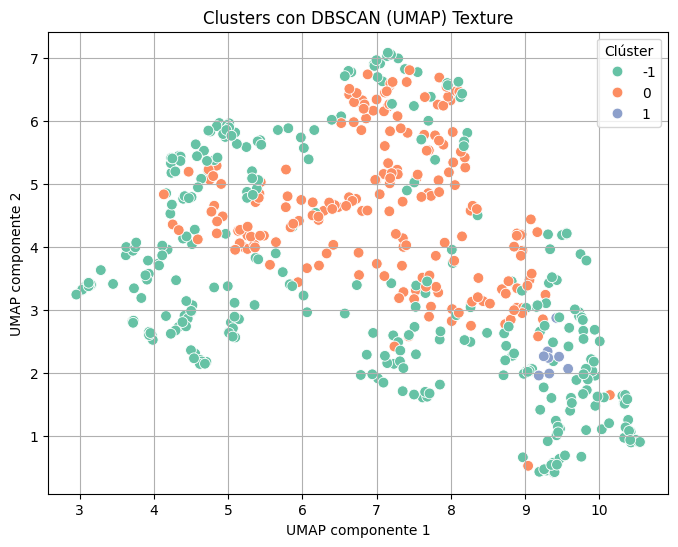

In [109]:

# Aplicar UMAP
umap_model_zscore = umap.UMAP(n_neighbors=18, n_components=2, min_dist=0.01, random_state=42)  
X_umap_zscore = umap_model_zscore.fit_transform(X_combined_all_z)

# Crear DataFrame para visualización
df_plot = pd.DataFrame({
    'UMAP 1': X_umap_zscore[:, 0],
    'UMAP 2': X_umap_zscore[:, 1],
    'Cluster': labels.astype(str)  # Asegúrate de que 'labels' esté definido
})

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='UMAP 1',
    y='UMAP 2',
    hue='Cluster',
    palette='Set2',
    s=60,
    edgecolor='white',
    alpha=1,
    legend='full'
)

plt.title("Clusters con DBSCAN (UMAP) Texture")
plt.xlabel("UMAP componente 1")
plt.ylabel("UMAP componente 2")
plt.grid(True)
plt.legend(title='Clúster')
plt.show()


In [190]:
clustering_umap_z = DBSCAN(eps=0.75, min_samples=25).fit(X_umap_zscore)
clustering_umap_z.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [191]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [192]:
y_true = df_combined_all_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher           15  253
smaller         212   57


In [195]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_zscore[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.478


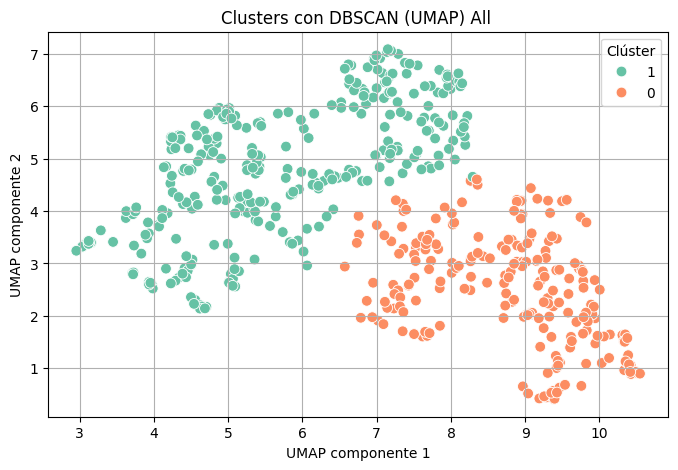

In [197]:
# Crear DataFrame para visualización
df_plot = pd.DataFrame({
    'UMAP 1': X_umap_zscore[:, 0],
    'UMAP 2': X_umap_zscore[:, 1],
    'Cluster': labels.astype(str)  # Convertimos a string para visualización categórica
})

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='UMAP 1',
    y='UMAP 2',
    hue='Cluster',
    palette='Set2',
    s=60,
    edgecolor='white',
    alpha=1,
    legend='full'
)

plt.title("Clusters con DBSCAN (UMAP) All ")
plt.xlabel("UMAP componente 1")
plt.ylabel("UMAP componente 2")
plt.grid(True)
plt.legend(title='Clúster')
plt.show()

In [ ]:
#min-max umap

In [219]:
umap_model_mm = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.01, random_state=42)  
X_umap_mm = umap_model_mm.fit_transform(X_combined_all_mm)

clustering_umap_mm = DBSCAN(eps=0.8, min_samples=30).fit(X_umap_mm)
clustering_umap_mm.labels_

labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

y_true = df_combined_all_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")



c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Número de clusters: 3
Número de puntos de ruido: 23
Cluster DBSCAN  -1    0   1    2
Etiqueta Real                   
higher           3   17  13  235
smaller         20  201  28   20
Silhouette Score (sin ruido): 0.353


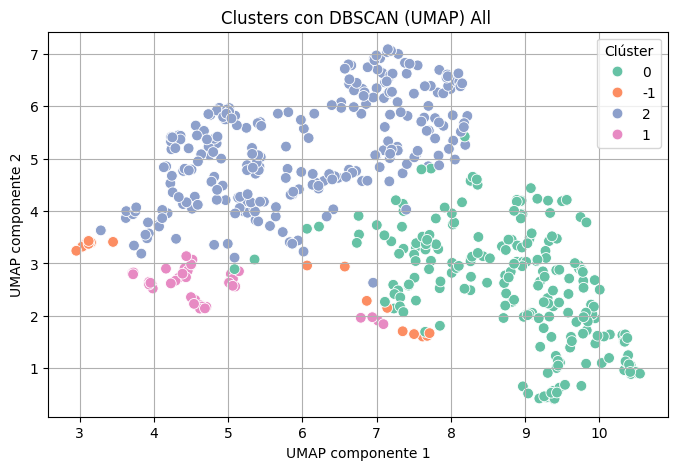

In [220]:
# Crear DataFrame para visualización
df_plot = pd.DataFrame({
    'UMAP 1': X_umap_zscore[:, 0],
    'UMAP 2': X_umap_zscore[:, 1],
    'Cluster': labels.astype(str)  # Convertimos a string para visualización categórica
})

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='UMAP 1',
    y='UMAP 2',
    hue='Cluster',
    palette='Set2',
    s=60,
    edgecolor='white',
    alpha=1,
    legend='full'
)

plt.title("Clusters con DBSCAN (UMAP) All ")
plt.xlabel("UMAP componente 1")
plt.ylabel("UMAP componente 2")
plt.grid(True)
plt.legend(title='Clúster')
plt.show()